# **Pizza Price Prediction**

### Pizza is an Italian dish consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a pizzaiolo.


### In this we are trying to predict the prices of the pizza based on the factors like Diameter , toppings, extras , variants and size.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Using Kaggle API to import Dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"prodigiousphoton","key":"cea6c912a484a4ee07cf635547372b98"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d knightbearr/pizza-price-prediction

pizza-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/pizza-price-prediction.zip

Archive:  /content/pizza-price-prediction.zip
replace pizza_v1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace pizza_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#### Data Preprocessing

In [ ]:
data = pd.read_csv('/content/pizza_v2.csv')
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [ ]:
data.shape

(129, 9)

In [ ]:
data['price'] = data['price_rupiah'].replace(',','')

In [ ]:
data['price_rupiah']

0      Rp235,000
1      Rp198,000
2      Rp120,000
3      Rp155,000
4      Rp248,000
         ...    
124     Rp39,000
125     Rp72,000
126     Rp99,000
127     Rp44,000
128     Rp78,000
Name: price_rupiah, Length: 129, dtype: object

In [ ]:
data['price'] = data['price'].apply(lambda x: x.replace(',',''))

In [ ]:
data['price']

0      Rp235000
1      Rp198000
2      Rp120000
3      Rp155000
4      Rp248000
         ...   
124     Rp39000
125     Rp72000
126     Rp99000
127     Rp44000
128     Rp78000
Name: price, Length: 129, dtype: object

In [ ]:
data = data.drop('price_rupiah', axis=1)

In [ ]:
#create a new column that will include the price 
data['price'] = data['price'].replace(',', '').apply(lambda x: x[2:])

In [ ]:
data['price'] = data['price'].astype('int64')

In [ ]:
data['price']

0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 129, dtype: int64

In [ ]:
data.head(10)

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22 inch,chicken,double_signature,jumbo,yes,yes,no,235000
1,A,20 inch,papperoni,double_signature,jumbo,yes,yes,no,198000
2,A,16 inch,mushrooms,double_signature,reguler,yes,yes,yes,120000
3,A,14 inch,smoked_beef,double_signature,reguler,yes,no,yes,155000
4,A,18 inch,mozzarella,double_signature,jumbo,yes,no,yes,248000
5,A,18.5 inch,black_papper,american_favorite,jumbo,no,no,yes,140000
6,A,16 inch,smoked_beef,american_favorite,jumbo,no,yes,yes,110000
7,A,8 inch,papperoni,american_favorite,reguler,no,no,yes,70000
8,A,12 inch,mushrooms,american_favorite,reguler,yes,no,yes,90000
9,A,12 inch,smoked_beef,american_favorite,reguler,no,no,no,90000


In [ ]:
data['diameter'] = data['diameter'].apply(lambda x: x.replace('inch',''))

In [ ]:
data['diameter'] = data['diameter'].astype('float')

In [ ]:
data['diameter']

0      22.0
1      20.0
2      16.0
3      14.0
4      18.0
       ... 
124     8.5
125    12.0
126    14.0
127     8.5
128    12.0
Name: diameter, Length: 129, dtype: float64

In [ ]:
data.describe()

,diameter,price
count,129.000000,129.000000
mean,12.976744,87151.162791
std,3.272674,44706.097732
min,8.000000,23500.000000
25%,12.000000,51000.000000
50%,12.000000,78000.000000
75%,14.000000,105000.000000
max,22.000000,248000.000000


In [ ]:
data['size'] = data['size'].map({'small':'0','medium':'1','large':'2','XL':'3','jumbo':'4','reguler':'5'})

In [ ]:
data['size'].value_counts()

1    41
0    22
2    21
5    20
4    15
3    10
Name: size, dtype: int64

In [ ]:
data['size']

0      4
1      4
2      5
3      5
4      4
      ..
124    0
125    1
126    2
127    0
128    1
Name: size, Length: 129, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
categorical_cols = ['topping', 'variant','company']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,0,22.0,2,8,4,yes,yes,no,235000
1,0,20.0,7,8,4,yes,yes,no,198000
2,0,16.0,5,8,5,yes,yes,yes,120000
3,0,14.0,9,8,5,yes,no,yes,155000
4,0,18.0,4,8,4,yes,no,yes,248000


In [ ]:
categorical_cols = ['extra_sauce', 'extra_cheese','extra_mushrooms']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,0,22.0,2,8,4,1,1,0,235000
1,0,20.0,7,8,4,1,1,0,198000
2,0,16.0,5,8,5,1,1,1,120000
3,0,14.0,9,8,5,1,0,1,155000
4,0,18.0,4,8,4,1,0,1,248000


#### Data Visualization

In [ ]:
data.corr()

,company,diameter,topping,variant,extra_sauce,extra_cheese,extra_mushrooms,price
company,1.000000,-0.182710,0.002093,-0.109497,-0.038954,0.034503,0.018026,-0.300033
diameter,-0.182710,1.000000,-0.178475,0.193343,-0.063957,0.055488,-0.006347,0.826977
topping,0.002093,-0.178475,1.000000,0.255129,0.042505,-0.012019,-0.128149,-0.077875
variant,-0.109497,0.193343,0.255129,1.000000,-0.029388,0.268582,-0.080839,0.130395
extra_sauce,-0.038954,-0.063957,0.042505,-0.029388,1.000000,-0.089131,0.050174,0.083859
extra_cheese,0.034503,0.055488,-0.012019,0.268582,-0.089131,1.000000,-0.066227,0.011817
extra_mushrooms,0.018026,-0.006347,-0.128149,-0.080839,0.050174,-0.066227,1.000000,0.032990
price,-0.300033,0.826977,-0.077875,0.130395,0.083859,0.011817,0.032990,1.000000


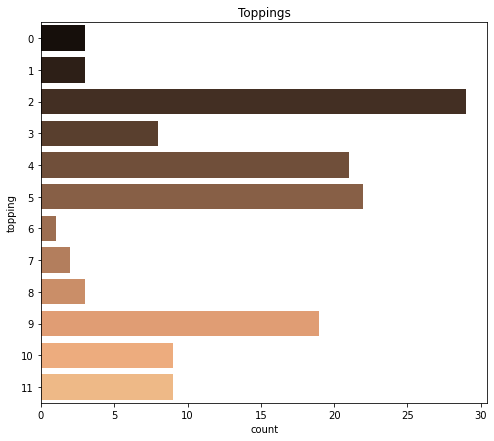

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(y='topping', data=data, palette='copper');
plt.title('Toppings')
plt.show()

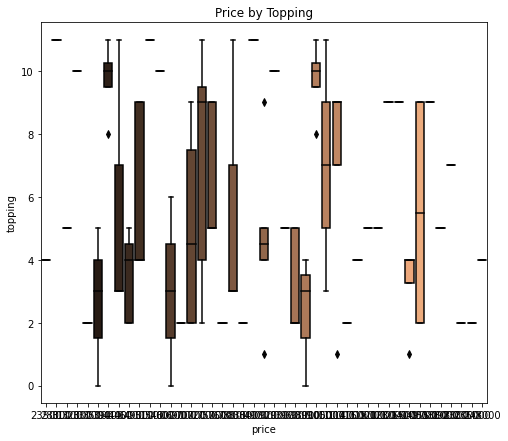

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(y='topping', x='price', data=data, palette='copper')
plt.title('Price by Topping')
plt.show()

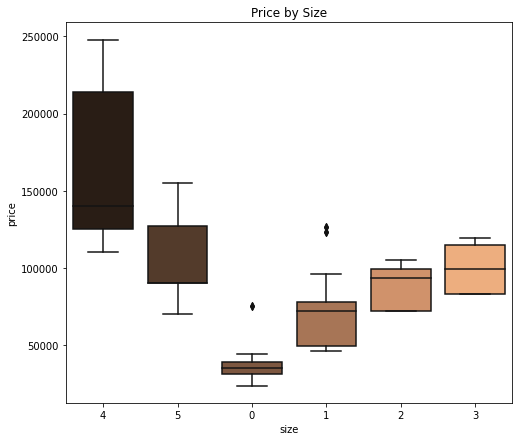

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x='size', y='price', data=data,palette='copper')
plt.title('Price by Size')
plt.show()

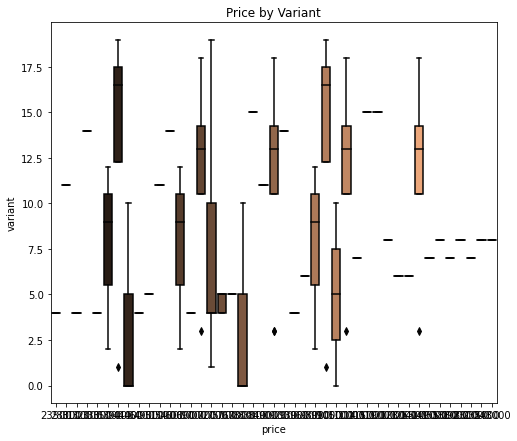

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(y='variant', x='price', data=data, palette='copper')
plt.title('Price by Variant')
plt.show()

### Model Creation 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [ ]:
x=data.drop('price', axis = 1).values

In [ ]:
y=data['price'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 25)

#### Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf_pred= rf.predict(x_test)

#### Ridge Regression

In [ ]:
rm = Ridge(alpha=1.0)
rm.fit(x_train, y_train)
rm_pred= rm.predict(x_test)

#### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

#### XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train) 
xgb_pred = xgb.predict(x_test) 

[04:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.metrics import r2_score

#### R2 Score

In [ ]:
print(r2_score(y_test, lr_pred))
print(r2_score(y_test, rf_pred))
print(r2_score(y_test, rm_pred))
print(r2_score(y_test, xgb_pred))

0.7675995835168192
0.9370883685521363
0.7678898481383135
0.9073313743259654


#### RMSE Score

In [ ]:
rm_rmse=np.sqrt(mean_squared_error(y_test,rm_pred))
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [ ]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Ridge Regression','Random Forest Regression','XG Boost Regressor'], 
                         'RMSE': [lr_rmse,rm_rmse, rf_rmse,xgb_rmse]})
model_ev

,Model,RMSE
0,Linear Regression,23143.143935
1,Ridge Regression,23128.686700
2,Random Forest Regression,12041.189166
3,XG Boost Regressor,14614.039151


#### We can see that overall Random Forest Regression , gives out the lowest RMSE , of 12041.189 in comparison to Ridge , XG Boost and Linear Regression RMSE scores.

### Conclusion : Hence , in this project we have used four Regression Models to predict the Pizza Prices on our Dataset.We used Linear Regression , Random Forest Regressor , XG Boost Regressor and Ridge Regression Models.Out of these 4 , Random Forest gave us the lowest RMSE , so we can further use Random Forest Model for better accuracy models , rather than other Regression Models.This model can help resturant owners and food outlet owners to predict the Pizza prices which they should keep in order to keep in a healthy competition in accordance to there high sales